# **Análise de dados sobre final da NBA - Celtics x Warriors**

Dataset retirado de: https://www.kaggle.com/datasets/neelgajare/warriors-vs-celtics-all-past-games

Este dataframe contem todos os resultados de jogos anteriores entre Boston Celtics e Golden State Warriors. 
A análise será exploratória dos dados e vou demonstrar alguns fatores interessantes sobre esse confronto!

Acompanhe comigo ⏩

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
ce_wa = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Estudos Python/Celtics.Warriors/warriorsceltics.csv")
ce_wa['Partidas'] = np.arange(1,347)
ce_wa

,Unnamed: 0,Date,Home Team,Away Team,Win or Loss for Celtics,Win or Loss for Warriors,Celtics score,Warriors score,Streak,Partidas
0,0,"Mar 16, 2022",Warriors,Celtics,W,L,110,88,Celtics won 1,1
1,1,"Dec 17, 2021",Celtics,Warriors,L,W,107,111,Warriors won 1,2
2,2,"Apr 17, 2021",Celtics,Warriors,W,L,119,114,Celtics won 5,3
3,3,"Feb 2, 2021",Warriors,Celtics,W,L,111,107,Celtics won 4,4
4,4,"Jan 30, 2020",Celtics,Warriors,W,L,119,104,Celtics won 3,5
...,...,...,...,...,...,...,...,...,...,...
341,341,"Feb 3, 1947",Celtics,Warriors,L,W,55,61,Warriors won 3,342
342,342,"Jan 21, 1947",Warriors,Celtics,L,W,43,59,Warriors won 2,343
343,343,"Dec 27, 1946",Celtics,Warriors,L,W,60,63,Warriors won 1,344
344,344,"Dec 14, 1946",Celtics,Warriors,W,L,77,65,Celtics won 1,345


In [3]:
ce_wa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                346 non-null    int64 
 1   Date                      346 non-null    object
 2   Home Team                 346 non-null    object
 3   Away Team                 346 non-null    object
 4   Win or Loss for Celtics   346 non-null    object
 5   Win or Loss for Warriors  346 non-null    object
 6   Celtics score             346 non-null    int64 
 7   Warriors score            346 non-null    int64 
 8   Streak                    346 non-null    object
 9   Partidas                  346 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 27.2+ KB


In [4]:
#Substituindo as colunas [Win os Loss for... ] por uma coluna com valores binários

ce_wa['Win or Loss for Celtics'].replace(['W',"L"],[1,0],inplace=True)
ce_wa['Win or Loss for Warriors'].replace(['W',"L"],[1,0],inplace=True)
ce_wa

,Unnamed: 0,Date,Home Team,Away Team,Win or Loss for Celtics,Win or Loss for Warriors,Celtics score,Warriors score,Streak,Partidas
0,0,"Mar 16, 2022",Warriors,Celtics,1,0,110,88,Celtics won 1,1
1,1,"Dec 17, 2021",Celtics,Warriors,0,1,107,111,Warriors won 1,2
2,2,"Apr 17, 2021",Celtics,Warriors,1,0,119,114,Celtics won 5,3
3,3,"Feb 2, 2021",Warriors,Celtics,1,0,111,107,Celtics won 4,4
4,4,"Jan 30, 2020",Celtics,Warriors,1,0,119,104,Celtics won 3,5
...,...,...,...,...,...,...,...,...,...,...
341,341,"Feb 3, 1947",Celtics,Warriors,0,1,55,61,Warriors won 3,342
342,342,"Jan 21, 1947",Warriors,Celtics,0,1,43,59,Warriors won 2,343
343,343,"Dec 27, 1946",Celtics,Warriors,0,1,60,63,Warriors won 1,344
344,344,"Dec 14, 1946",Celtics,Warriors,1,0,77,65,Celtics won 1,345


**Quantidade de vitórias para cada time**

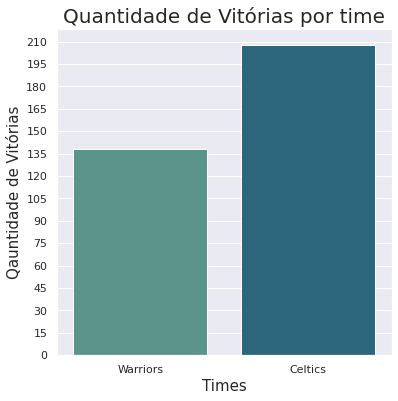

In [30]:
#Quantidade de  vitórias para cada time
fig = plt.figure(figsize=(6,6))

sns.countplot(x=ce_wa['Win or Loss for Celtics'], palette='crest')
sns.set()
plt.title('Quantidade de Vitórias por time', fontsize=20)
plt.xlabel('Times',fontsize=15)
plt.ylabel('Qauntidade de Vitórias', fontsize=15)
ticks, labels = plt.xticks()
plt.xticks(ticks, labels=['Warriors','Celtics'])
plt.yticks(np.arange(0,225,15))
plt.show()

**Warriors Mandante**

Warriors Mandante
Jogos com Warriors mandante:  157
Vitórias com Warriors mandante:  84
Derrotas com Warriors mandante:  73


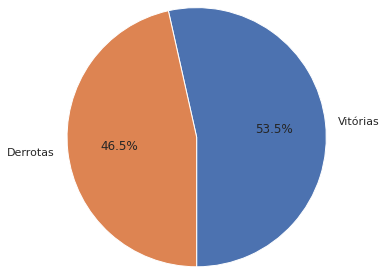

In [6]:
#Warriors Mandante

homeW = ce_wa.loc[ce_wa['Home Team']=='Warriors']
jogosW = homeW['Win or Loss for Warriors'].count()
vitoriasW = homeW['Win or Loss for Warriors'].sum()
derrotasW = jogosW - vitoriasW

print('\033[1m' + 'Warriors Mandante'+'\033[0m')
print('Jogos com Warriors mandante: ', jogosW)
print('Vitórias com Warriors mandante: ', vitoriasW)
print('Derrotas com Warriors mandante: ', derrotasW)

fig = plt.figure(figsize=(3,3))
ax = fig.add_axes([0,0,0.75,0.75])
ax.pie([vitoriasW,derrotasW],labels =['Vitórias','Derrotas'],autopct='%.1f%%', startangle=270, radius=2)
plt.show()


**Celtics Mandante**

Celtics Mandante
Jogos com Celtics mandante:  154
Vitórias com Celtics mandante:  114
Derrotas com Celtics mandante:  40


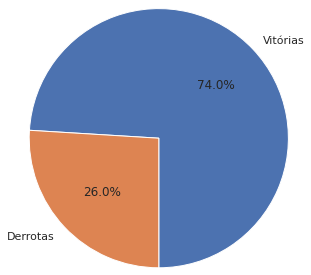

In [7]:
#Celtics Mandante

homeC = ce_wa.loc[ce_wa['Home Team']=='Celtics']
jogosC = homeC['Win or Loss for Celtics'].count()
vitoriasC = homeC['Win or Loss for Celtics'].sum()
derrotasC = jogosC - vitoriasC


print('\033[1m' + 'Celtics Mandante'+'\033[0m')
print('Jogos com Celtics mandante: ', jogosC)
print('Vitórias com Celtics mandante: ', vitoriasC)
print('Derrotas com Celtics mandante: ', derrotasC)

fig = plt.figure(figsize=(3,3))
ax = fig.add_axes([0,0,0.75,0.75])
ax.pie([vitoriasC,derrotasC],labels =['Vitórias','Derrotas'],autopct='%.1f%%', startangle=270, radius=2)

plt.show()

🏀 *Neste gráfico fica mais claro o quão decisivo é o fator casa para os jogos do boston Celtics, pois ganharam 74% dos jogos que disputaram, enquanto os warriors apenas 53.5%*

# **SEQUÊNCIA DE VITÓRIAS**


In [29]:
streak = ce_wa.groupby('Streak').count()['Partidas']
streak

Streak
Celtics won 1     87
Celtics won 10     3
Celtics won 11     2
Celtics won 12     1
Celtics won 13     1
Celtics won 2     44
Celtics won 3     22
Celtics won 4     19
Celtics won 5     11
Celtics won 6      5
Celtics won 7      5
Celtics won 8      5
Celtics won 9      3
Warriors won 1    87
Warriors won 2    33
Warriors won 3    12
Warriors won 4     4
Warriors won 5     2
Name: Partidas, dtype: int64

🏀 Podemos ver que os Celtics tem ampla dominância em relação a sequência de vitórias em relação aos Warriors. Assim, Temos as seguintes informações:


*   Sequência máxima de vitória do Celtics: **13 Jogos**
*   Sequência máxima de vitória do Warriors: **5 Jogos**
*   Os Warriors só conseguiram ter uma série de **5** vitórias 2 vezes, enquanto os Celtics conseguiram **11**. 




# **ANÁLISE DA PONTUAÇÃO**

[]

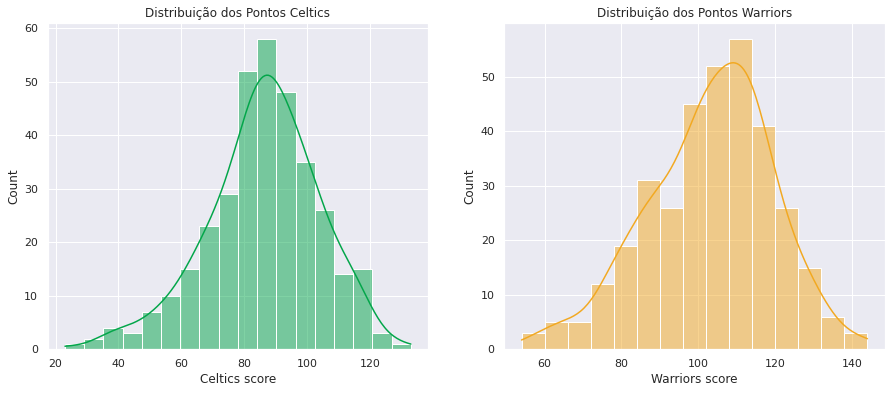

In [11]:
# Distribuição dos Pontos
fig = plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.histplot(ce_wa['Celtics score'], kde = True,color='#03A64A')
plt.title('Distribuição dos Pontos Celtics')
ticks, labels = plt.xticks()
plt.xticks(ticks, labels=(np.arange(0,161,20)))
plt.plot()

plt.subplot(1,2,2)
sns.histplot(ce_wa['Warriors score'], kde = True, color='#F2A922')
plt.title('Distribuição dos Pontos Warriors')
plt.plot()

**Dividindo todas as partidas em 3 grupos para apresentar graficamente as pontuações das partidas**

In [12]:
#Pontos por time dividido em três grupos 

topW = ce_wa.loc[ce_wa['Partidas']<115]['Warriors score']
topC = ce_wa.loc[ce_wa['Partidas']<115]['Celtics score']

midW = ce_wa.loc[(ce_wa['Partidas']>=115) & (ce_wa['Partidas']<230)]['Warriors score']
midC = ce_wa.loc[(ce_wa['Partidas']>=115) & (ce_wa['Partidas']<230)]['Celtics score']

lowW = ce_wa.loc[(ce_wa['Partidas']>=230)]['Warriors score']
lowC= ce_wa.loc[(ce_wa['Partidas']>=230)]['Celtics score']

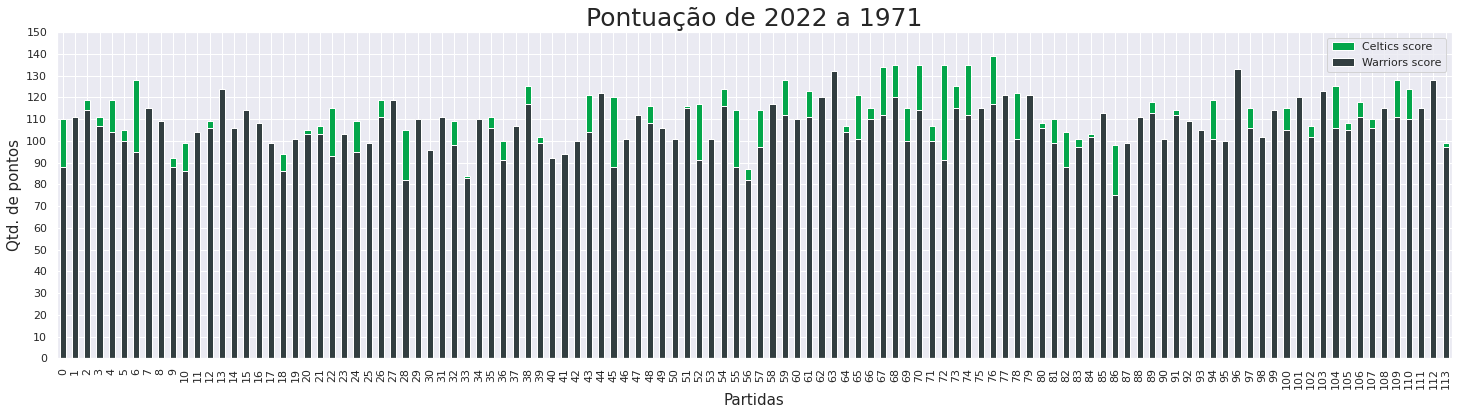

In [13]:
# Pontuação de 2022 a 1971

fig = plt.figure(figsize=(25,6))

topC.plot(kind='bar',color='#03A64A', legend=True)
topW.plot(kind='bar',color='#323E40', legend=True)

plt.title('Pontuação de 2022 a 1971', fontsize=25)
plt.xlabel('Partidas',fontsize=15)
plt.ylabel('Qtd. de pontos', fontsize=15)
plt.yticks(np.arange(0,151,10))

plt.show()


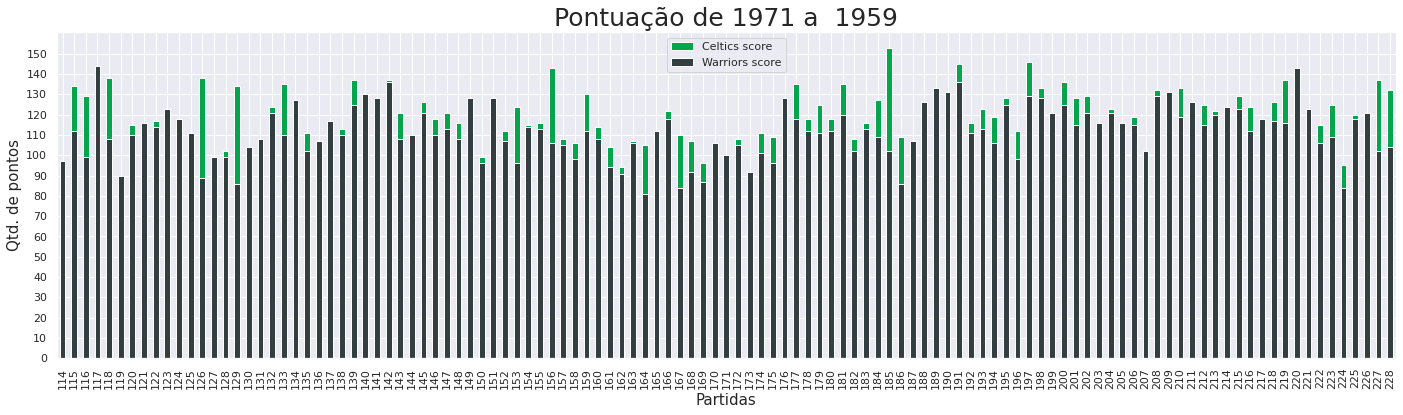

In [14]:
# Pontuação de 1971 a 1959

fig = plt.figure(figsize=(24,6))

midC.plot(kind='bar',color='#03A64A', legend=True)
midW.plot(kind='bar',color='#323E40',legend=True)

plt.title('Pontuação de 1971 a  1959', fontsize=25)
plt.xlabel('Partidas',fontsize=15)
plt.ylabel('Qtd. de pontos', fontsize=15)
plt.yticks(np.arange(0,151,10))

plt.show()


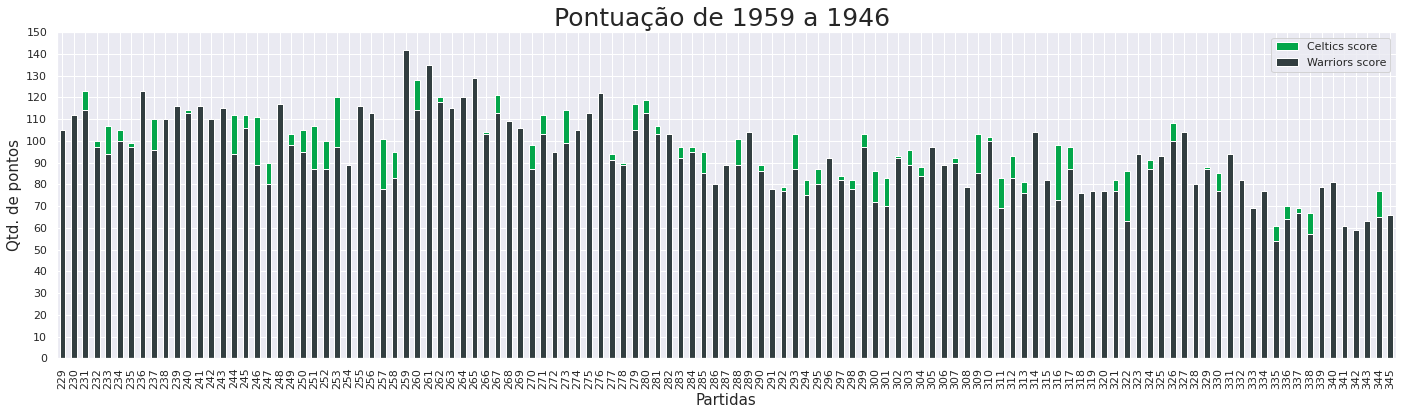

In [15]:
# Pontuação de 1959 a 1946

fig = plt.figure(figsize=(24,6))

lowC.plot(kind='bar',color='#03A64A', legend=True)
lowW.plot(kind='bar',color='#323E40',legend=True)

plt.title('Pontuação de 1959 a 1946 ', fontsize=25)
plt.xlabel('Partidas',fontsize=15)
plt.ylabel('Qtd. de pontos', fontsize=15)
plt.yticks(np.arange(0,151,10))

plt.show()

**Últimos 30 confrontros**

[]

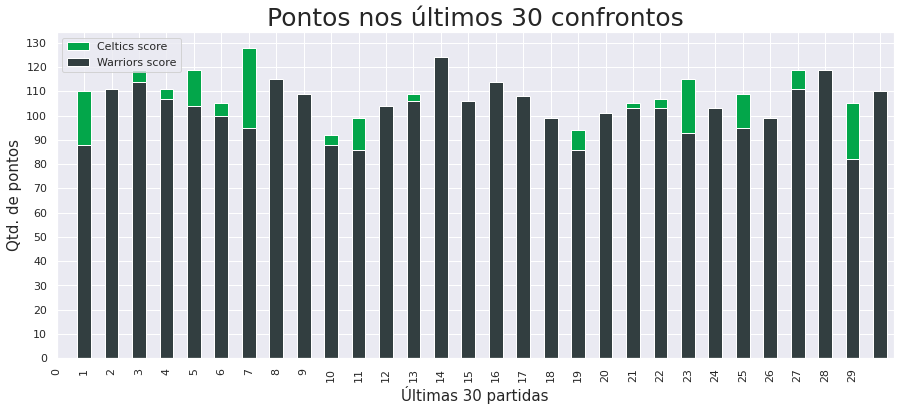

In [16]:
# Últimos 30 confrontos

fig = plt.figure(figsize=(15,6))

ultimas_partidas = ce_wa.loc[ce_wa['Partidas']<=30]
ultimas_partidas['Celtics score'].plot(kind='bar', color='#03A64A', legend=True)
ultimas_partidas['Warriors score'].plot(kind='bar', color='#323E40',legend=True) 

plt.title('Pontos nos últimos 30 confrontos', fontsize=25)
plt.xlabel('Últimas 30 partidas',fontsize=15)
plt.ylabel('Qtd. de pontos', fontsize=15)
plt.yticks(np.arange(0,131,10))
plt.xticks(np.arange(-1,30,1))
plt.plot()

In [17]:
# Analisando as pontuções das últimas 30 Partidas

pts_celtic20 = ultimas_partidas['Celtics score'].mean()
pts_warriors20 = ultimas_partidas['Warriors score'].mean()
pts_max_warrios20 = ultimas_partidas['Warriors score'].max()
pts_min_warrios20 = ultimas_partidas['Warriors score'].min()
pts_max_celtics20 = ultimas_partidas['Celtics score'].max()
pts_min_celtics20 = ultimas_partidas['Celtics score'].min()

print('Celtics')
print(' Média de pontos dos Celtics: ', int(pts_celtic20))
print(' Pontuação máxima dos Celtics: ', pts_max_celtics20)
print(' Pontuação mínima dos Celtics: ', pts_min_celtics20, '\n', '-'*45)

print('Warriors')
print(' Média de pontos dos Warriors: ', int(pts_warriors20))
print(' Pontuação máxima dos Warriors: ', pts_max_warrios20)
print(' Pontuação mínima dos Warriors: ', pts_min_warrios20)

Celtics
 Média de pontos dos Celtics:  105
 Pontuação máxima dos Celtics:  128
 Pontuação mínima dos Celtics:  83 
 ---------------------------------------------
Warriors
 Média de pontos dos Warriors:  102
 Pontuação máxima dos Warriors:  124
 Pontuação mínima dos Warriors:  82


**Análise histórica das pontuações** 

In [24]:
# Analisando as pontuações históricas

pts_celtic = ce_wa['Celtics score'].mean()
pts_warriors = ce_wa['Warriors score'].mean()
pts_max_warrios = ce_wa['Warriors score'].max()
pts_min_warrios = ce_wa['Warriors score'].min()
pts_max_celtics = ce_wa['Celtics score'].max()
pts_min_celtics = ce_wa['Celtics score'].min()

print('Celtics')
print(' Média de pontos dos Celtics: ', int(pts_celtic))
print(' Pontuação máxima dos Celtics: ', pts_max_celtics)
print(' Pontuação mínima dos Celtics: ', pts_min_celtics, '\n', '-'*40)
print('Warriors')
print(' Média de pontos dos Warriors: ', int(pts_warriors))
print(' Pontuação máxima dos Warriors: ', pts_max_warrios)
print(' Pontuação mínima dos Warriors: ', pts_min_warrios)

Celtics
 Média de pontos dos Celtics:  106
 Pontuação máxima dos Celtics:  153
 Pontuação mínima dos Celtics:  43 
 ----------------------------------------
Warriors
 Média de pontos dos Warriors:  103
 Pontuação máxima dos Warriors:  144
 Pontuação mínima dos Warriors:  54


**Maior diferença entre placares**

In [19]:
# Verificando a maior diferença de placar
diferenca_placar = np.abs(ce_wa['Celtics score']-ce_wa['Warriors score'])
max_diferenca = max(diferenca_placar)
max_diferenca


51

In [20]:
# Identificando qual o index desse placar
diferenca_placar.loc[diferenca_placar==51]

185    51
dtype: int64

In [21]:
# Apresentando todos os dados dessa partida
ce_wa.loc[ce_wa.index==185]

,Unnamed: 0,Date,Home Team,Away Team,Win or Loss for Celtics,Win or Loss for Warriors,Celtics score,Warriors score,Streak,Partidas
185,185,"Mar 7, 1962",Celtics,Warriors,1,0,153,102,Celtics won 2,186


# **CONSIDERAÇÕES FINAIS**

Ainda que essa base de dados não contenha mais dados a respeito das pontuações por quarto de jogo e da fase do campeonato em que os times se enfretaram, podemos ver que o Celtics possui uma boa vantagem no confronto contra os Warriors, com vitórias expressivas entre 1959 e 1980, principalmente pelo fato de que o Boston Celtics é, ao lado do Lakers, o maior vencedor da NBA com 17 títulos, e justamente nesse período em que o Celtics mais ganhou títulos na sua história, ou seja, a dominância no jogo era muito grande.

Na atual temporada da NBA, o Golden State Warriors é apontado como favorito para ganhar o título, porem vimos atráves dos dados, que o Celtics pode complicar esse caminho, principalmente pela expressividade de vitórias quando joga em casa!

Lembrando que essa análise é realizado e pensanda totalmente por Felipe Sanitá, que ama os esportes e E-sports, assim como gosta de dedicar um tempo para entender como os dados históricos disponíveis pode nos ajudar a compreender melhor o cenário atual e o futuro! 

🏀 ♥ ✅
